# Handle Regions in the image

In interferometric imaging or any image processing, often we need to set regions where the intensity will be solved or to mask images. SMILI provide a class for handling geometric description of such regions.

[This notebook](imregion.ipynb) provides an example usage how to read, set and save image regions.

In [ ]:
%matplotlib inline
from pylab import *
from smili import imdata, util

Here, we use [an FITS image](BU_3C273_sampleimage.fits) reconstructed with SMILI from a 43 GHz 3C 273 data set of [the Boston University Blazar Group](https://www.bu.edu/blazars/VLBAproject.html).

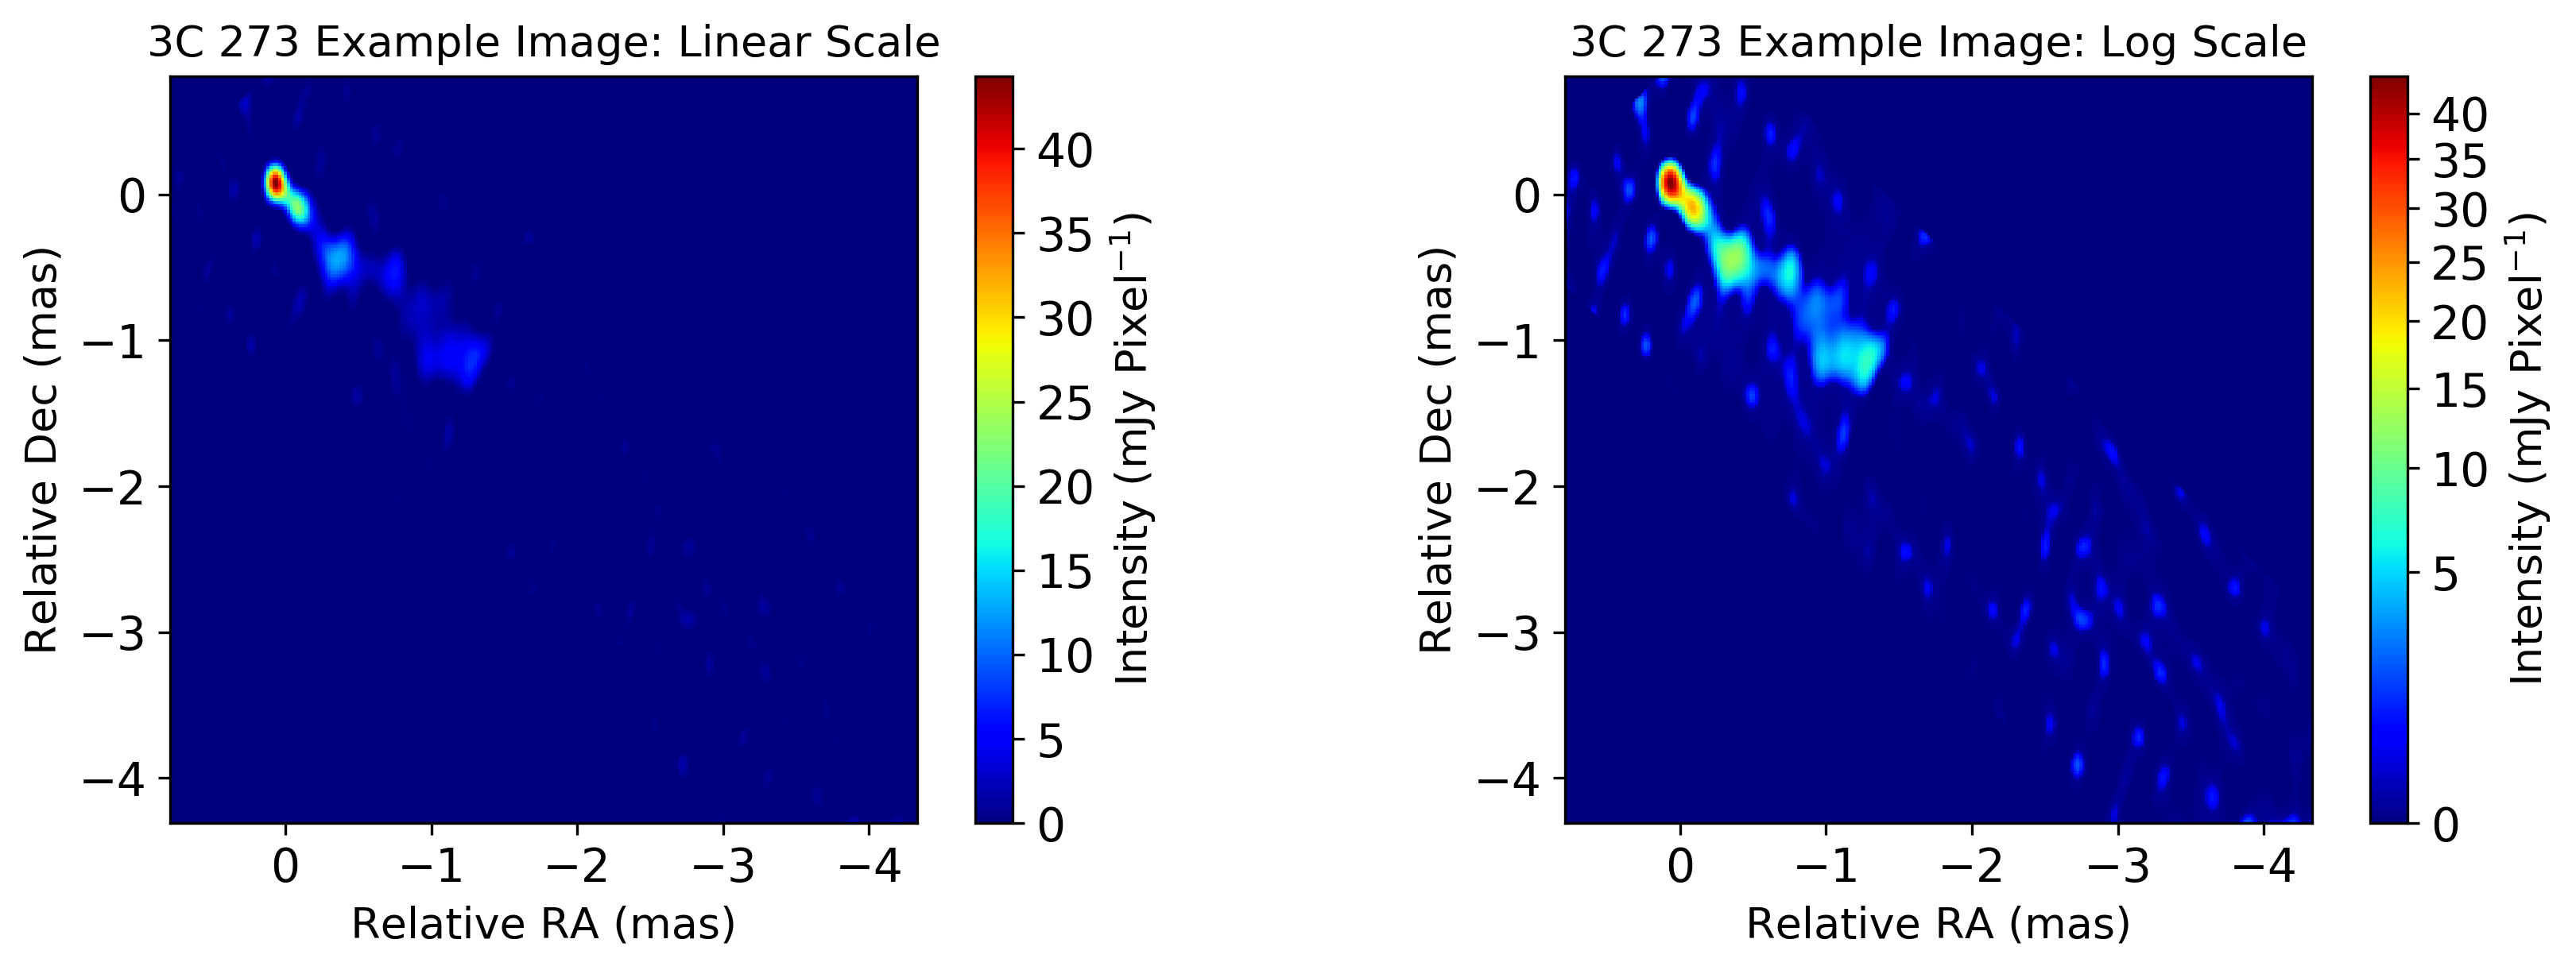

In [2]:
# Load the FITS image
image = imdata.IMFITS("./BU_3C273_sampleimage.fits", angunit="mas")

# Plot the image in linear and log scales
util.matplotlibrc(ncols=2, width=500, height=300)
fig, axs = plt.subplots(ncols=2)

plt.sca(axs[0])
plt.title("3C 273 Example Image: Linear Scale")
image.imshow(colorbar=True, fluxunit="mjy", cmap=cm.jet)

plt.sca(axs[1])
plt.title("3C 273 Example Image: Log Scale")
image.imshow(scale="gamma", fluxunit="mjy", colorbar=True, cmap=cm.jet)

mpl.rcdefaults()

## Interactively set imaging regions using SAO DS9

SMILI can intractively set regions with [SAO DS9](http://ds9.si.edu/site/Home.html) using [pyds9](http://hea-www.harvard.edu/RD/pyds9/). To load your image to DS9, you can use *open_pyds9* method of your image object.

In [3]:
# Open this image in DS9
image.open_pyds9()

Or alternatively, you can create a *imdata.IMRegion* object and use *open_pyds9* method.

In [4]:
# Initialize an IMRegion object
imregion = imdata.IMRegion()

# Open the image in DS9. If this imregion has already some regions, it will be sent to DS9 as well.
imregion.open_pyds9(image)

You can see your image in DS9 and set regions.

![](ds9_sample_1.png)

You can set a region by clicking **EDIT > Region**. Currently, SMILI can handle circles, squares and ellipses in DS9.
Here, ellipses are set to the area with significant flux densities.

![](ds9_sample_2.png)
![](ds9_sample_3.png)

You can pull regions from DS9 with load_pyds9 methods in imdata.IMFITS or imdata.IMRegion objects.

In [5]:
# eighther of commands will work to pull regions from DS9
imregion = image.load_pyds9()
imregion = imregion.load_pyds9(image)

The imdata.IMRegion class is inheriting [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). You can use all functions available for pandas.DataFrame. 

In [6]:
imregion

,shape,xc,yc,width,height,radius,maja,mina,angle,angunit
0,circle,61.83334,80.4166,NaN,NaN,214.16716,NaN,NaN,NaN,uas
1,circle,-98.79166,-101.6250,NaN,NaN,214.16716,NaN,NaN,NaN,uas
2,circle,-270.12500,-305.0834,NaN,NaN,239.36694,NaN,NaN,NaN,uas
3,circle,-377.20834,-519.2500,NaN,NaN,273.55490,NaN,NaN,NaN,uas
4,circle,-655.62500,-562.0834,NaN,NaN,283.40834,NaN,NaN,NaN,uas
5,circle,-912.62500,-744.1250,NaN,NaN,369.12282,NaN,NaN,NaN,uas
6,circle,-1137.50000,-1108.2084,NaN,NaN,422.75350,NaN,NaN,NaN,uas


In addition, it has additional functions. For instance, you can plot your regions with *plot* method.

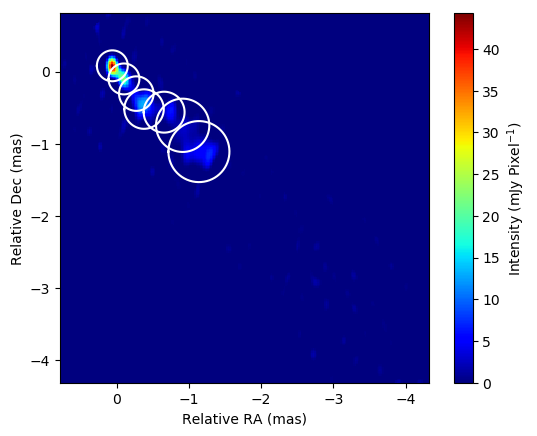

In [8]:
# plot the original image as a reference
image.imshow(colorbar=True, fluxunit="mjy", cmap=cm.jet)

# plot regions. You can use any arguments of pyplot.plot for customizing your plots.
imregion.plot(color="white", angunit="mas")

You can save this region file to a [csv file](imregion.csv) with *to_csv* method, and load it again with *imdata.read_imregion* function

In [9]:
# save this region file to a csv file
imregion.to_csv("imregion.csv")

# load this region file from the csv file
imregion = imdata.read_imregion("imregion.csv")

If you have a pixel-coordinated DS9 region file, you can also read it with load_ds9reg method

In [ ]:
# Load DS9 region file (must be using pixel-based coordinates)
imregion_ds9 = imdata.IMRegion()
imregion_ds9 = imregion_ds9.load_ds9reg(regfile="xxx.reg",image=image)

## Manually set/edit imaging regions

You can also add regions from SMILI. This would be useful to pipeline imaging scripts.

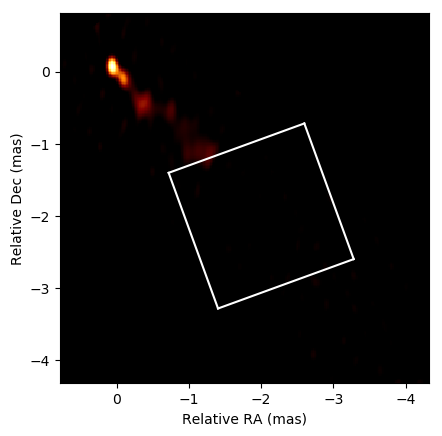

In [11]:
# Adding a box
imregion_box = imdata.IMRegion()
imregion_box= imregion_box.add_box(xc=-2,yc=-2,width=2,angle=20,angunit="mas")

# Check
image.imshow()
imregion_box.plot(color="white")

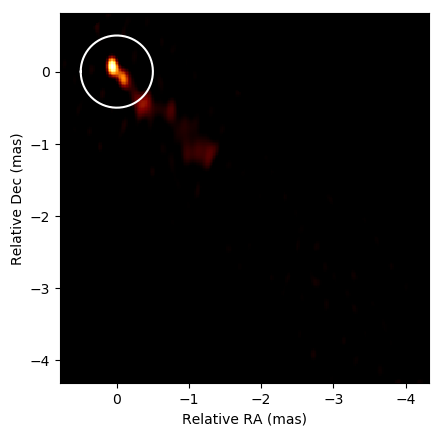

In [12]:
# Adding a circle
imregion_circ = imdata.IMRegion()
imregion_circ= imregion_circ.add_circle(xc=0,yc=0,radius=0.5,angunit="mas")

# Check
image.imshow()
imregion_circ.plot(color="white")

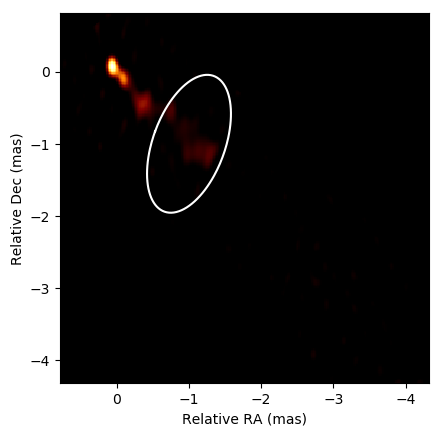

In [13]:
# Adding a circle
imregion_ellip = imdata.IMRegion()
imregion_ellip = imregion_ellip.add_ellipse(xc=-1,yc=-1,maja=2,mina=1,angle=20,angunit="mas")

# Check
image.imshow()
imregion_ellip.plot(color="white")

There are some other useful functions to edit regions

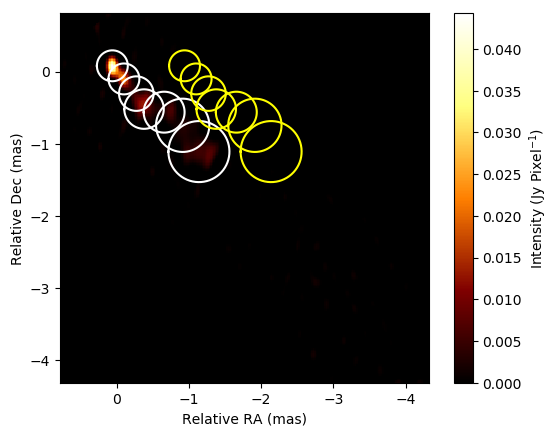

In [15]:
# Shifting imaging regions.
imregion_shift = imregion.copy()
imregion_shift.shift(dx=-1,dy=0,angunit="mas")

# Check
image.imshow(colorbar=True)
imregion.plot(color="white", label="original", angunit="mas")
imregion_shift.plot(color="yellow", label="shifted", angunit="mas")

In [ ]:
# Zoom regions
imregion_zoom = imregion.copy()
imregion_zoom.zoom(fx=3)

# Check
image.imshow(colorbar=True)
imregion.plot(color="white", label="original")
imregion_zoom.plot(color="yellow")

You can also add regions.

Create region1 and region2.

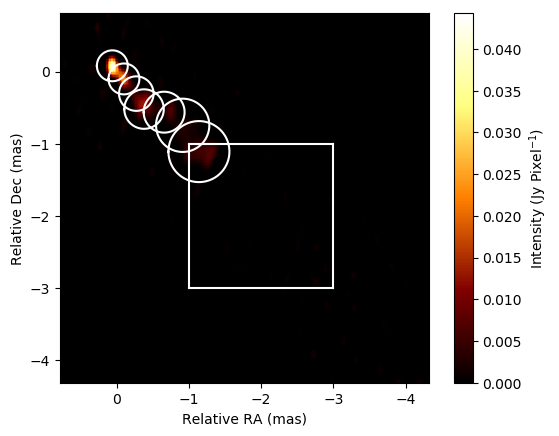

In [16]:
# Create two imaging regions
imregion1 = imregion.copy()
imregion2 = imdata.IMRegion().add_box(xc=-2,yc=-2,width=2,angle=0,angunit="mas")

# Take a sum
imregion3 = imregion1 + imregion2

# Check
image.imshow(colorbar=True)
imregion3.plot(color="white", angunit="mas")

## Masking image with imregion

You can mask images with winmod methods in imdata.IMFITS/imdata.IMRegion objects.

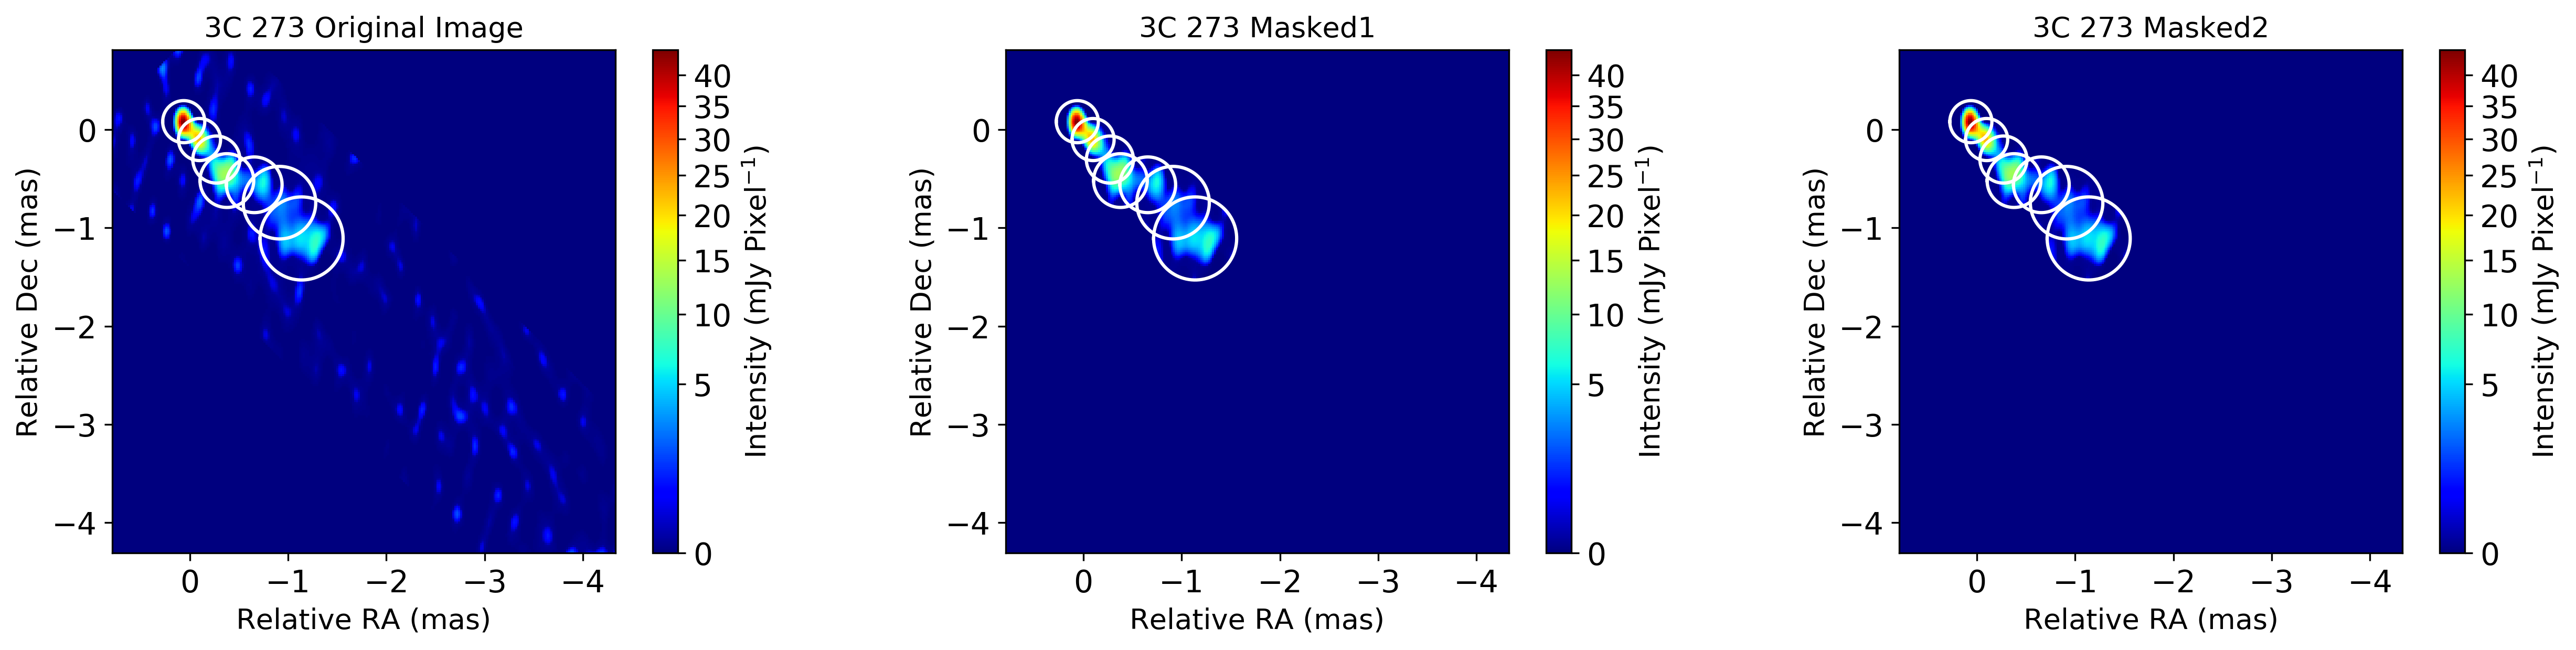

In [17]:
# These commands are equivalent
editimage1 = imregion.winmod(image,save_totalflux=False)
editimage2 = image.winmod(imregion, save_totalflux=False)

# Check: indeed you can see all brightness outside regions are cleared.
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("3C 273 Original Image")
image.imshow(scale="gamma",  fluxunit="mjy", colorbar=True,cmap=cm.jet)
imregion.plot(color="white", angunit="mas")

plt.sca(axs[1])
plt.title("3C 273 Masked1")
editimage1.imshow(scale="gamma", fluxunit="mjy", colorbar=True, cmap=cm.jet)
imregion.plot(color="white", angunit="mas")

plt.sca(axs[2])
plt.title("3C 273 Masked2")
editimage2.imshow(scale="gamma", fluxunit="mjy", colorbar=True, cmap=cm.jet)
imregion.plot(color="white", angunit="mas")

mpl.rcdefaults()

You can also creat a "mask image", which can be loaded to imaging functions as well

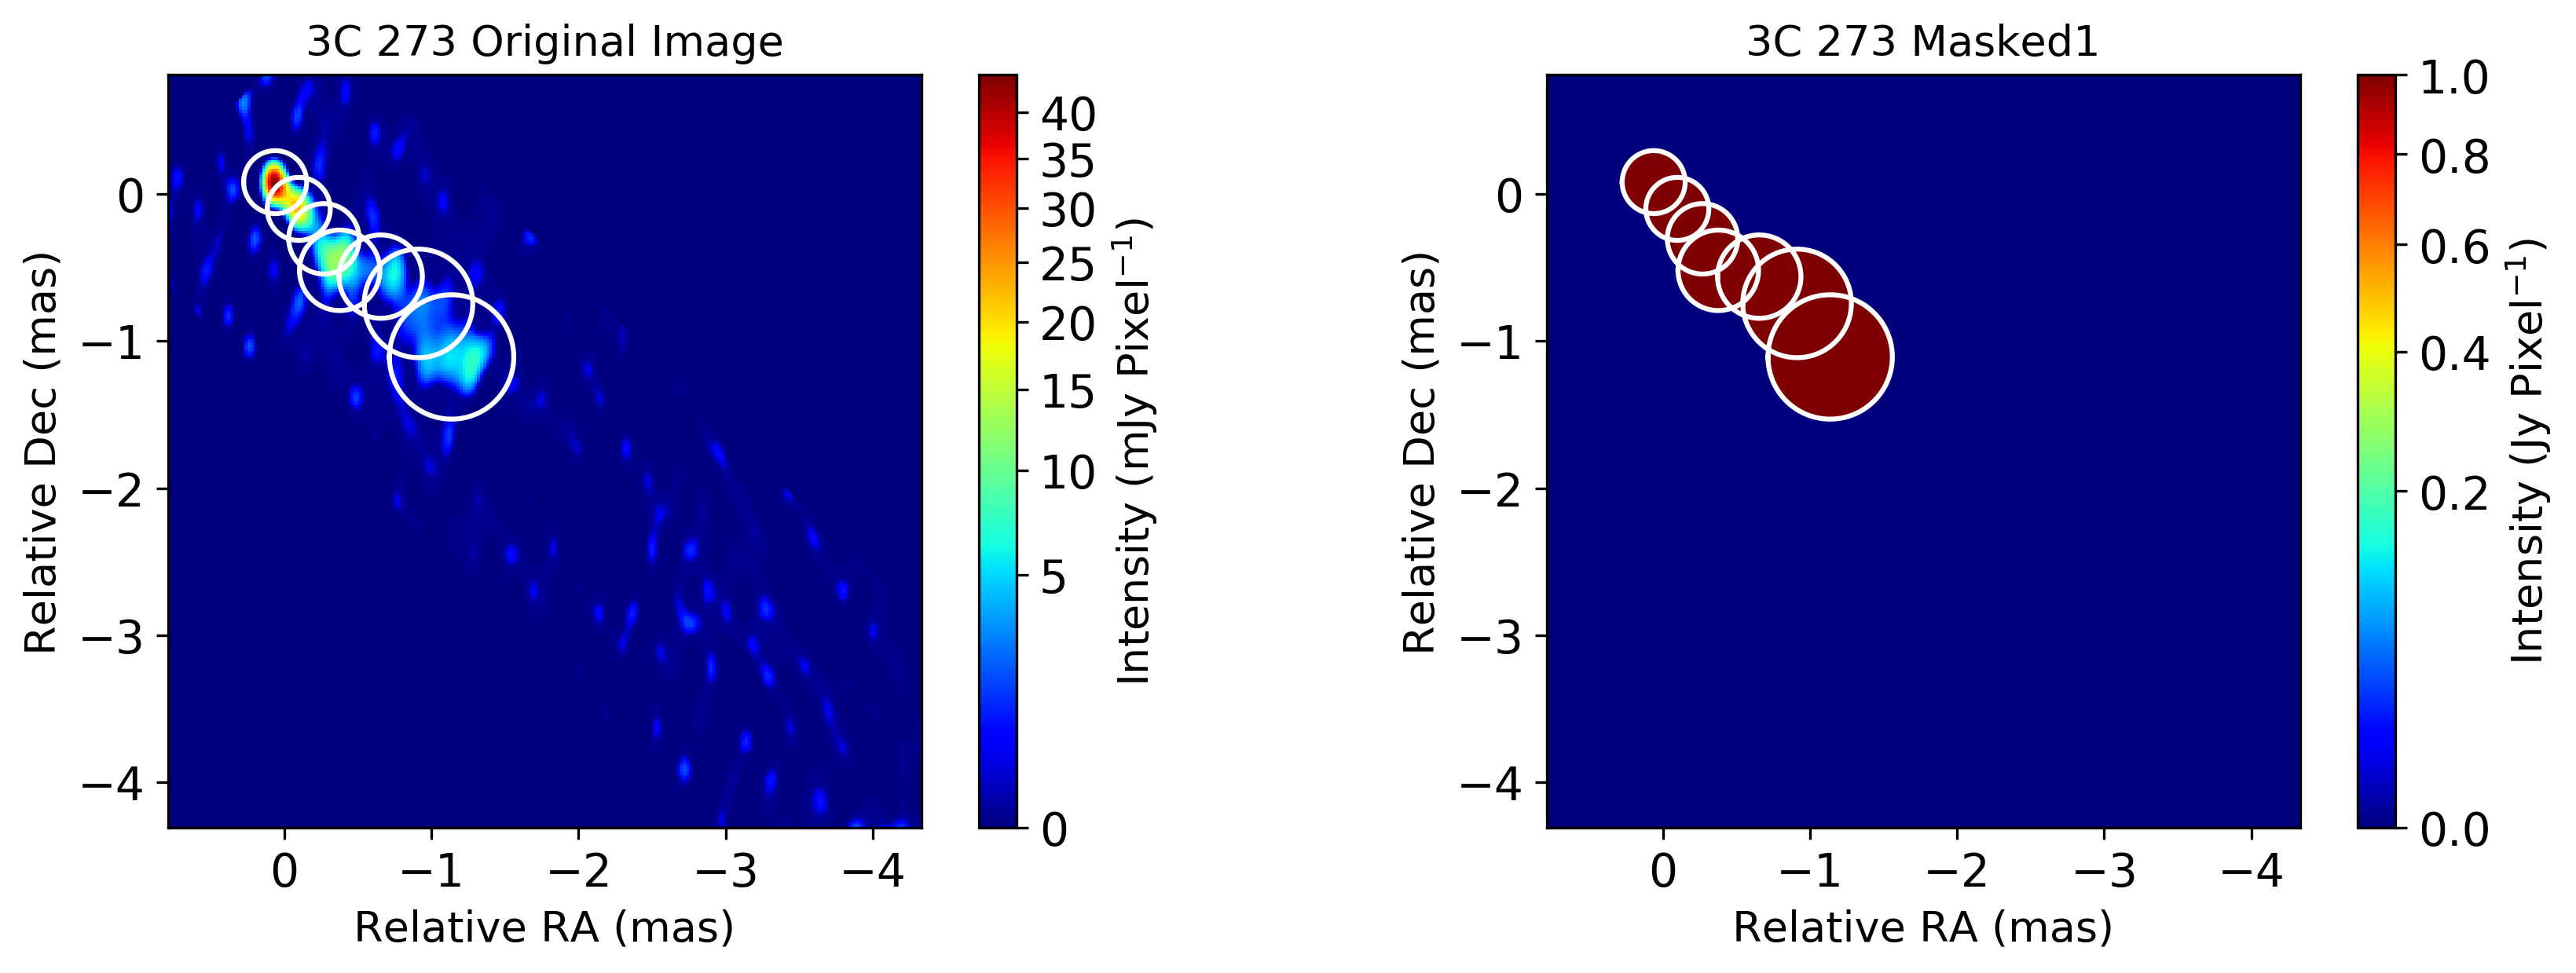

In [19]:
# Create a mask image
maskimage = imregion.maskimage(image)

# Check: indeed you can see all brightness outside regions are cleared.
util.matplotlibrc(ncols=2, width=500, height=300)
fig, axs = plt.subplots(ncols=2)

plt.sca(axs[0])
plt.title("3C 273 Original Image")
image.imshow(scale="gamma",  fluxunit="mjy", colorbar=True,cmap=cm.jet)
imregion.plot(color="white", angunit="mas")

plt.sca(axs[1])
plt.title("3C 273 Masked1")
maskimage.imshow(scale="gamma", colorbar=True, cmap=cm.jet)
imregion.plot(color="white", angunit="mas")

mpl.rcdefaults()